# Train a JointVAE model

### Get MNIST data
Build a simple JointVAE model on MNIST

In [18]:
from utils.dataloaders import get_mnist_dataloaders
train_loader, test_loader = get_mnist_dataloaders(batch_size=64)

### Define latent distribution of the model

In [19]:
# Latent distribution will be joint distribution of 10 gaussian normal distributions
# and one 10 dimensional Gumbel Softmax distribution
latent_spec = {'cont': 10,
               'disc': [10]}

### Build a model

In [20]:
from jointvae.models import VAE

model = VAE(latent_spec=latent_spec, img_size=(1, 32, 32))

In [21]:
print(model)

VAE(
  (img_to_features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
  )
  (features_to_hidden): Sequential(
    (0): Linear(in_features=1024, out_features=256, bias=True)
    (1): ReLU()
  )
  (fc_mean): Linear(in_features=256, out_features=10, bias=True)
  (fc_log_var): Linear(in_features=256, out_features=10, bias=True)
  (fc_alphas): ModuleList(
    (0): Linear(in_features=256, out_features=10, bias=True)
  )
  (latent_to_features): Sequential(
    (0): Linear(in_features=20, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=1024, bias=True)
    (3): ReLU()
  )
  (features_to_img): Sequential(
    (0): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv

### Train the model

In [22]:
from torch import optim

# Build optimizer
optimizer = optim.Adam(model.parameters(), lr=5e-4)

In [23]:
from jointvae.training import Trainer

# Define the capacities
# Continuous channels
cont_capacity = [0.0, 5.0, 25000, 30.0]  # Starting at a capacity of 0.0, increase this to 5.0
                                         # over 25000 iterations with a gamma of 30.0
# Discrete channels
disc_capacity = [0.0, 5.0, 25000, 30.0]  # Starting at a capacity of 0.0, increase this to 5.0
                                         # over 25000 iterations with a gamma of 30.0

# Build a trainer
trainer = Trainer(model, optimizer,
                  cont_capacity=cont_capacity,
                  disc_capacity=disc_capacity)

In [24]:
# Build a visualizer which will be passed to trainer to visualize progress during training
from viz.visualize import Visualizer

viz = Visualizer(model)

In [25]:
# Train model for 10 epochs
# Note this should really be a 100 epochs and trained on a GPU, but this is just to demo

trainer.train(train_loader, epochs=10, save_training_gif=('./training.gif', viz))

0/60000	Loss: 699.367
3200/60000	Loss: 526.442
6400/60000	Loss: 305.341
9600/60000	Loss: 279.369
12800/60000	Loss: 275.504
16000/60000	Loss: 273.062
19200/60000	Loss: 271.448
22400/60000	Loss: 271.727
25600/60000	Loss: 271.979
28800/60000	Loss: 268.752
32000/60000	Loss: 267.965
35200/60000	Loss: 268.570
38400/60000	Loss: 266.873
41600/60000	Loss: 266.212
44800/60000	Loss: 266.496
48000/60000	Loss: 265.427
51200/60000	Loss: 261.710
54400/60000	Loss: 262.949
57600/60000	Loss: 260.450
Epoch: 1 Average loss: 284.58
0/60000	Loss: 271.084
3200/60000	Loss: 259.601
6400/60000	Loss: 260.003
9600/60000	Loss: 257.882
12800/60000	Loss: 256.378
16000/60000	Loss: 259.008
19200/60000	Loss: 255.445
22400/60000	Loss: 256.978
25600/60000	Loss: 254.583
28800/60000	Loss: 256.848
32000/60000	Loss: 255.628
35200/60000	Loss: 251.737
38400/60000	Loss: 252.917
41600/60000	Loss: 253.391
44800/60000	Loss: 251.204
48000/60000	Loss: 248.861
51200/60000	Loss: 249.632
54400/60000	Loss: 250.133
57600/60000	Loss: 250.

### Visualize

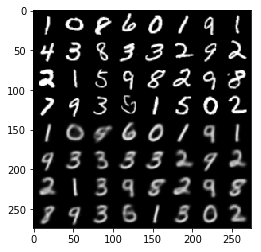

In [26]:
# Plot reconstructions
%matplotlib inline
import matplotlib.pyplot as plt

# Get a batch of data
for batch, labels in test_loader:
    break

# Reconstruct data using Joint-VAE model
recon = viz.reconstructions(batch)

plt.imshow(recon.numpy()[0, :, :], cmap='gray')

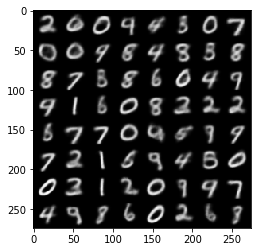

In [27]:
# Plot samples
samples = viz.samples()
plt.imshow(samples.numpy()[0, :, :], cmap='gray')

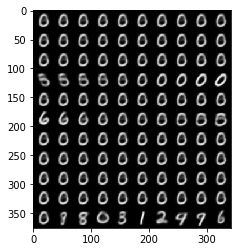

In [28]:
# Plot all traversals
traversals = viz.all_latent_traversals(size=10)
plt.imshow(traversals.numpy()[0, :, :], cmap='gray')

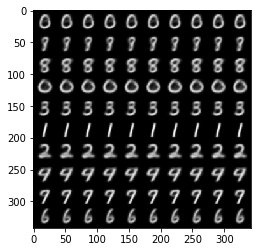

In [29]:
# Plot a grid of some traversals
traversals = viz.latent_traversal_grid(cont_idx=2, cont_axis=1, disc_idx=0, disc_axis=0, size=(10, 10))
plt.imshow(traversals.numpy()[0, :, :], cmap='gray')